In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv('C:/kaggle/storesales/test.csv')

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [3]:
df_train = pd.read_csv('C:/kaggle/storesales/train.csv')
df_test = pd.read_csv('C:/kaggle/storesales/test.csv')
df_train.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [4]:
df_train.store_nbr.unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
df_train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [7]:
df_train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [8]:
df_train.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dtype: int64

In [9]:
df_stores = pd.read_csv('C:/kaggle/storesales/stores.csv')
df_stores.head(10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [10]:
df_holidays = pd.read_csv('C:/kaggle/storesales/holidays_events.csv')
df_holidays.head(10)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [11]:
df_oil = pd.read_csv('C:/kaggle/storesales/oil.csv')
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [12]:
df_transaction = pd.read_csv('C:/kaggle/storesales/transactions.csv')
df_transaction.head(10)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


In [13]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train.sample(10)

,id,date,store_nbr,family,sales,onpromotion
1599798,1599798,2015-06-19,46,MEATS,1826.470,51
721605,721605,2014-02-10,6,PLAYERS AND ELECTRONICS,0.000,0
600340,600340,2013-12-03,53,BOOKS,0.000,0
2472926,2472926,2016-10-22,45,BREAD/BAKERY,1559.925,1
2095230,2095230,2016-03-24,47,PLAYERS AND ELECTRONICS,20.000,0
1469638,1469638,2015-04-07,44,HOME AND KITCHEN II,28.000,1
2598062,2598062,2017-01-01,7,BREAD/BAKERY,0.000,0
1857613,1857613,2015-11-11,30,EGGS,84.000,0
2905825,2905825,2017-06-23,41,EGGS,96.000,20
554450,554450,2013-11-08,16,HOME APPLIANCES,0.000,0


In [14]:
df_train['day'] = df_train['date'].dt.day
df_train['month'] = df_train['date'].dt.month
df_train['year'] = df_train['date'].dt.year
df_train['dayofweek'] = df_train['date'].dt.dayofweek
df_train.sample(5)

,id,date,store_nbr,family,sales,onpromotion,day,month,year,dayofweek
443263,443263,2013-09-06,46,CLEANING,1636.0,0,6,9,2013,4
877489,877489,2014-05-09,3,LADIESWEAR,0.0,0,9,5,2014,4
1548812,1548812,2015-05-22,16,MAGAZINES,0.0,0,22,5,2015,4
657853,657853,2014-01-06,17,SCHOOL AND OFFICE SUPPLIES,0.0,0,6,1,2014,0
2731266,2731266,2017-03-17,43,LINGERIE,4.0,0,17,3,2017,4


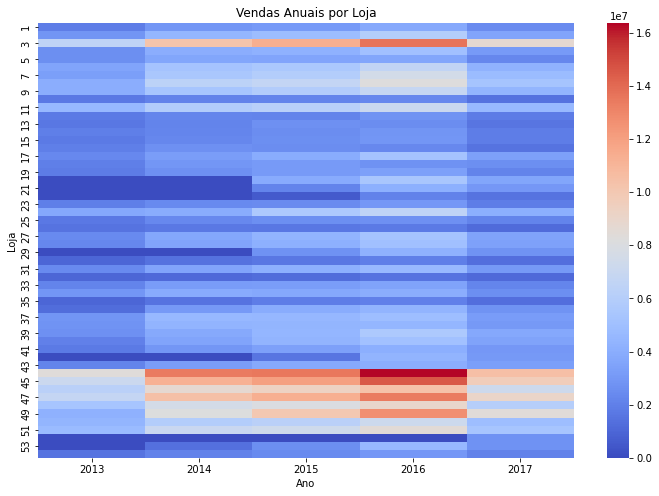

In [15]:
# Observamos que apenas algumas lojas sofreram mudanças significativas nas vendas anuais

annual_sales = df_train.groupby(['store_nbr', 'year']).agg({'sales': 'sum'}).reset_index()
year_table = annual_sales.pivot_table(index='store_nbr', columns='year', values='sales')

plt.figure(figsize=(12, 8))
sns.heatmap(year_table, cmap='coolwarm')
plt.title('Vendas Anuais por Loja')
plt.xlabel('Ano')
plt.ylabel('Loja')
plt.show()

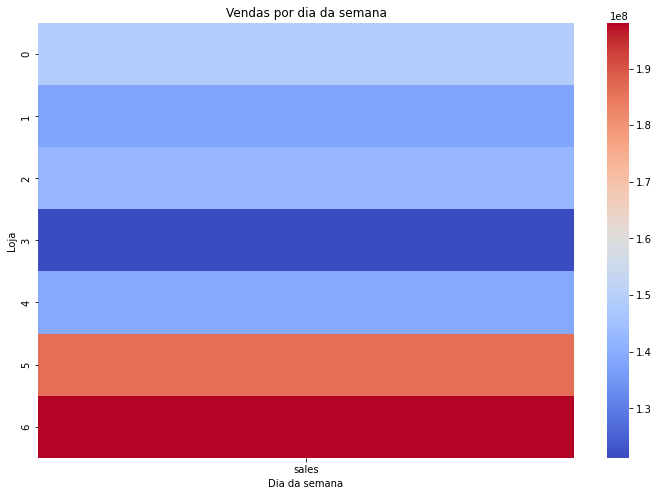

In [16]:
import numpy as np

# Observamos que os dias da semana alteram bastante os resultados das vendas (tendem a ser maiores durante os fins de semana)

day_week_table = pd.pivot_table(df_train, values ='sales', index =['dayofweek'], aggfunc = np.sum)

plt.figure(figsize=(12, 8))
sns.heatmap(day_week_table, cmap='coolwarm')
plt.title('Vendas por dia da semana')
plt.xlabel('Dia da semana')
plt.ylabel('Loja')
plt.show()

In [17]:
from sklearn.metrics import make_scorer
import numpy as np

# RMSLE: métrica usada no Kaggle
def rmsle(y_true, y_pred):
    # Garantir que as previsões não contenham valores negativos
    y_pred = np.maximum(0, y_pred)
    y_true = np.maximum(0, y_true)
    
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))


rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

In [18]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

# Selecionar dados para uma loja específica
store_nbr = 50
df_store_50 = df_train[df_train['store_nbr'] == store_nbr].copy()

In [19]:
# Como queremos prever dados futuros, é interessante manter essa estrutura para teste e validação
df_store_50 = df_store_50.sort_values(by='date')

# Determinar o ponto de divisão (80% para treino, 20% para validação)
train_size = int(len(df_store_50) * 0.8)

# Dividir os dados
train_data = df_store_50.iloc[:train_size]
val_data = df_store_50.iloc[train_size:]

print(f'Tamanho do conjunto de treino: {len(train_data)}')
print(f'Tamanho do conjunto de validação: {len(val_data)}')

Tamanho do conjunto de treino: 44457
Tamanho do conjunto de validação: 11115


In [20]:
train_data = pd.get_dummies(train_data, columns=['family'])
val_data = pd.get_dummies(val_data, columns=['family'])

X_train = train_data.drop(columns=['sales','date','id','store_nbr'])
y_train = train_data['sales']

X_val = val_data.drop(columns=['sales','date','id','store_nbr'])
y_val = val_data['sales']

In [21]:
model = XGBRegressor(n_estimators=10, max_depth=20, verbosity=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

score = model.score(X_val, y_val)
print(f'Model Score: {score}')
rmsle_score = rmsle(y_val, y_pred)
print(f'Stacking Model RMSLE: {rmsle_score}')

Model Score: 0.9298281575581455
Stacking Model RMSLE: 1.1670080520318313


## Utilizando feriados no modelo

In [22]:
df_train = pd.merge(df_train, df_stores, on='store_nbr', how='left')
df_test = pd.merge(df_test, df_stores, on='store_nbr', how='left')
df_train.sample(5)

,id,date,store_nbr,family,sales,onpromotion,day,month,year,dayofweek,city,state,type,cluster
1131873,1131873,2014-09-29,18,CELEBRATION,5.0,0,29,9,2014,0,Quito,Pichincha,B,16
2468311,2468311,2016-10-20,16,EGGS,180.0,4,20,10,2016,3,Santo Domingo,Santo Domingo de los Tsachilas,C,3
888198,888198,2014-05-15,30,BEVERAGES,493.0,0,15,5,2014,3,Guayaquil,Guayas,C,3
1662773,1662773,2015-07-25,14,BEAUTY,2.0,0,25,7,2015,5,Riobamba,Chimborazo,C,7
1788821,1788821,2015-10-03,5,MAGAZINES,12.0,0,3,10,2015,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [23]:
df_holidays['date'] = pd.to_datetime(df_holidays['date'])
df_holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [24]:
df_holidays['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [25]:
df_holidays.nunique()

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

In [26]:
df_holidays = df_holidays[df_holidays['transferred'] == False]
df_holidays = df_holidays[df_holidays['type'] != 'Work Day']
df_holidays.nunique()

date           296
type             5
locale           3
locale_name     24
description     98
transferred      1
dtype: int64

In [27]:
national_holidays = df_holidays[df_holidays['locale'] == 'National'].copy()
regional_holidays = df_holidays[df_holidays['locale'] == 'Regional'].copy()
local_holidays = df_holidays[df_holidays['locale'] == 'Local'].copy()
national_holidays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 14 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         161 non-null    datetime64[ns]
 1   type         161 non-null    object        
 2   locale       161 non-null    object        
 3   locale_name  161 non-null    object        
 4   description  161 non-null    object        
 5   transferred  161 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 7.7+ KB


In [28]:
national_holidays.loc[:, 'holiday'] = 1
regional_holidays.loc[:, 'holiday'] = 1
local_holidays.loc[:, 'holiday'] = 1

In [29]:
national_holidays = national_holidays.drop(['type', 'locale', 'locale_name', 'description', 'transferred'], axis = 1)

In [30]:
national_holidays

,date,holiday
14,2012-08-10,1
20,2012-10-12,1
21,2012-11-02,1
22,2012-11-03,1
31,2012-12-21,1
...,...,...
345,2017-12-22,1
346,2017-12-23,1
347,2017-12-24,1
348,2017-12-25,1


In [31]:
df_test['date'] = pd.to_datetime(df_test['date'])
df_test['day'] = df_test['date'].dt.day
df_test['month'] = df_test['date'].dt.month
df_test['year'] = df_test['date'].dt.year
df_test['dayofweek'] = df_test['date'].dt.dayofweek

In [32]:
df_train = pd.merge(df_train, national_holidays, on='date', how='left')
df_test = pd.merge(df_test, national_holidays, on='date', how='left')

In [33]:
regional_holidays = regional_holidays.drop(['type', 'locale', 'description', 'transferred'], axis = 1)
local_holidays = local_holidays.drop(['type', 'locale', 'description', 'transferred'], axis = 1)
regional_holidays

,date,locale_name,holiday
1,2012-04-01,Cotopaxi,1
7,2012-06-25,Imbabura,1
23,2012-11-06,Santo Domingo de los Tsachilas,1
24,2012-11-07,Santa Elena,1
47,2013-04-01,Cotopaxi,1
58,2013-06-25,Imbabura,1
76,2013-11-06,Santo Domingo de los Tsachilas,1
77,2013-11-07,Santa Elena,1
96,2014-04-01,Cotopaxi,1
112,2014-06-25,Imbabura,1


In [34]:
df_train = pd.merge(df_train, regional_holidays, how='left', left_on=['date', 'state','holiday'], right_on=['date', 'locale_name','holiday'])
df_train = df_train.drop(['locale_name'], axis=1)

In [35]:
df_test = pd.merge(df_test, regional_holidays, how='left', left_on=['date', 'state','holiday'], right_on=['date', 'locale_name','holiday'])
df_test = df_test.drop(['locale_name'], axis=1)

In [36]:
df_train = pd.merge(df_train, local_holidays, how='left', left_on=['date', 'city','holiday'], right_on=['date', 'locale_name','holiday'])
df_train = df_train.drop(['locale_name'], axis=1)

In [37]:
df_test = pd.merge(df_test, local_holidays, how='left', left_on=['date', 'city','holiday'], right_on=['date', 'locale_name','holiday'])
df_test = df_test.drop(['locale_name'], axis=1)

In [38]:
df_train['holiday'].fillna(0, inplace=True)
df_test['holiday'].fillna(0, inplace=True)
df_train

,id,date,store_nbr,family,sales,onpromotion,day,month,year,dayofweek,city,state,type,cluster,holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,1,1,2013,1,Quito,Pichincha,D,13,1.0
1,1,2013-01-01,1,BABY CARE,0.000,0,1,1,2013,1,Quito,Pichincha,D,13,1.0
2,2,2013-01-01,1,BEAUTY,0.000,0,1,1,2013,1,Quito,Pichincha,D,13,1.0
3,3,2013-01-01,1,BEVERAGES,0.000,0,1,1,2013,1,Quito,Pichincha,D,13,1.0
4,4,2013-01-01,1,BOOKS,0.000,0,1,1,2013,1,Quito,Pichincha,D,13,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008011,3000883,2017-08-15,9,POULTRY,438.133,0,15,8,2017,1,Quito,Pichincha,B,6,0.0
3008012,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,15,8,2017,1,Quito,Pichincha,B,6,0.0
3008013,3000885,2017-08-15,9,PRODUCE,2419.729,148,15,8,2017,1,Quito,Pichincha,B,6,0.0
3008014,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,15,8,2017,1,Quito,Pichincha,B,6,0.0


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3008016 entries, 0 to 3008015
Data columns (total 15 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   day          int64         
 7   month        int64         
 8   year         int64         
 9   dayofweek    int64         
 10  city         object        
 11  state        object        
 12  type         object        
 13  cluster      int64         
 14  holiday      float64       
dtypes: datetime64[ns](1), float64(2), int64(8), object(4)
memory usage: 367.2+ MB


In [40]:
df_train.select_dtypes(include='object').columns.tolist()

['family', 'city', 'state', 'type']

In [41]:
df_train.select_dtypes(include=['int64']).columns.tolist()

['id',
 'store_nbr',
 'onpromotion',
 'day',
 'month',
 'year',
 'dayofweek',
 'cluster']

In [42]:
# Refazendo modelo da loja 50 com a informação do feriado
# Nota-se um aumento na acurácia do modelo, confirmando a informação

store_nbr = 50
df_store_50 = df_train[df_train['store_nbr'] == store_nbr].copy()

df_store_50 = df_store_50.sort_values(by='date')

# Determinar o ponto de divisão (80% para treino, 20% para validação)
train_size = int(len(df_store_50) * 0.8)

# Dividir os dados
train_data = df_store_50.iloc[:train_size]
val_data = df_store_50.iloc[train_size:]

X_train = train_data.drop(columns=['sales','date','id','store_nbr','city','state','type','cluster'])
y_train = train_data['sales']

X_val = val_data.drop(columns=['sales','date','id','store_nbr','city','state','type','cluster'])
y_val = val_data['sales']

categorical = ['family']

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical),
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())  # Modelo inicial
])

# Definir o espaço de hiperparâmetros para o GridSearch
param_grid = [
    {
        'model': [XGBRegressor()],
        'model__n_estimators': [50, 100],
        'model__max_depth': [10, 20],
        'model__learning_rate': [0.01, 0.1],
    },
    {
        'model': [RandomForestRegressor()],
        'model__n_estimators': [50, 100],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2, 5]
    },
    {
        'model': [LGBMRegressor()],
        'model__n_estimators': [50, 100],
        'model__max_depth': [10, 20],
        'model__learning_rate': [0.01, 0.1]
    }
]

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=rmsle_scorer, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Melhor estimador
best_pipeline = grid_search.best_estimator_

In [44]:
y_pred_best = best_pipeline.predict(X_val)

# Avaliar o melhor modelo
rmsle_best = rmsle(y_val, y_pred_best)
print(f'Best RMSLE: {rmsle_best}')

best_score = best_pipeline.score(X_val, y_val)
print(f'Best Model Score: {best_score}')

# Obter os resultados detalhados da validação cruzada
cv_results = pd.DataFrame(grid_search.cv_results_)

best_model = best_pipeline.named_steps['model']
print(f'Best Model: {best_model}')

Best RMSLE: 0.6098000731079085
Best Model Score: 0.9317374112216663
Best Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


## Adição de informação do petróleo e pagamento dos funcionarios

In [45]:
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


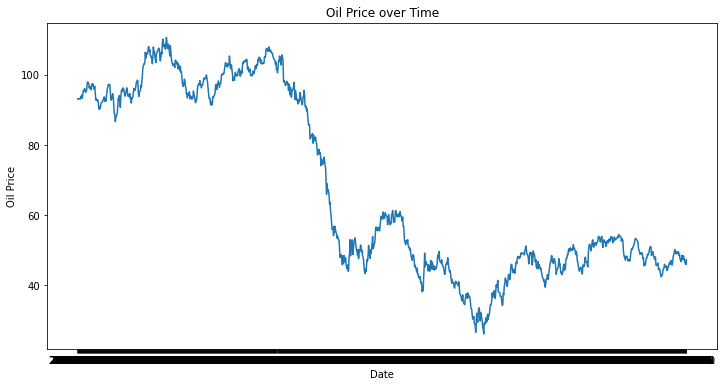

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_oil, x='date', y='dcoilwtico')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price over Time')
plt.show()

In [47]:
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [48]:
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].interpolate(method='linear')
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].ffill().bfill()
print(df_oil['dcoilwtico'].isnull().sum())

0


In [49]:
df_train = pd.merge(df_train, df_oil, on='date', how='left')
df_test = pd.merge(df_test, df_oil, on='date', how='left')

In [50]:
df_test

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,day,month,year,dayofweek,holiday,dcoilwtico
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,16,8,2017,2,0.0,46.80
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,16,8,2017,2,0.0,46.80
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,16,8,2017,2,0.0,46.80
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,16,8,2017,2,0.0,46.80
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,16,8,2017,2,0.0,46.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,Quito,Pichincha,B,6,31,8,2017,3,0.0,47.26
28508,3029396,2017-08-31,9,PREPARED FOODS,0,Quito,Pichincha,B,6,31,8,2017,3,0.0,47.26
28509,3029397,2017-08-31,9,PRODUCE,1,Quito,Pichincha,B,6,31,8,2017,3,0.0,47.26
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,Quito,Pichincha,B,6,31,8,2017,3,0.0,47.26


In [51]:
def is_payment_day(date):
    if date.day == 15 or date.day == date.days_in_month:
        return 1
    return 0

In [52]:
df_train['payment'] = df_train['date'].apply(is_payment_day)
df_test['payment'] = df_test['date'].apply(is_payment_day)

In [53]:
df_train

,id,date,store_nbr,family,sales,onpromotion,day,month,year,dayofweek,city,state,type,cluster,holiday,dcoilwtico,payment
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,1,1,2013,1,Quito,Pichincha,D,13,1.0,93.14,0
1,1,2013-01-01,1,BABY CARE,0.000,0,1,1,2013,1,Quito,Pichincha,D,13,1.0,93.14,0
2,2,2013-01-01,1,BEAUTY,0.000,0,1,1,2013,1,Quito,Pichincha,D,13,1.0,93.14,0
3,3,2013-01-01,1,BEVERAGES,0.000,0,1,1,2013,1,Quito,Pichincha,D,13,1.0,93.14,0
4,4,2013-01-01,1,BOOKS,0.000,0,1,1,2013,1,Quito,Pichincha,D,13,1.0,93.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008011,3000883,2017-08-15,9,POULTRY,438.133,0,15,8,2017,1,Quito,Pichincha,B,6,0.0,47.57,1
3008012,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,15,8,2017,1,Quito,Pichincha,B,6,0.0,47.57,1
3008013,3000885,2017-08-15,9,PRODUCE,2419.729,148,15,8,2017,1,Quito,Pichincha,B,6,0.0,47.57,1
3008014,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,15,8,2017,1,Quito,Pichincha,B,6,0.0,47.57,1


In [54]:
df_test

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,day,month,year,dayofweek,holiday,dcoilwtico,payment
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,16,8,2017,2,0.0,46.80,0
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,16,8,2017,2,0.0,46.80,0
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,16,8,2017,2,0.0,46.80,0
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,16,8,2017,2,0.0,46.80,0
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,16,8,2017,2,0.0,46.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,Quito,Pichincha,B,6,31,8,2017,3,0.0,47.26,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0,Quito,Pichincha,B,6,31,8,2017,3,0.0,47.26,1
28509,3029397,2017-08-31,9,PRODUCE,1,Quito,Pichincha,B,6,31,8,2017,3,0.0,47.26,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,Quito,Pichincha,B,6,31,8,2017,3,0.0,47.26,1


In [55]:
# Treino do modelo para todas as lojas

df_train = df_train.sort_values(by='date')

# Determinar o ponto de divisão (80% para treino, 20% para validação)
train_size = int(len(df_train) * 0.8)

# Dividir os dados
train_data = df_train.iloc[:train_size]
val_data = df_train.iloc[train_size:]

X_train = train_data.drop(columns=['sales','date','id'])
y_train = train_data['sales']

X_val = val_data.drop(columns=['sales','date','id'])
y_val = val_data['sales']

categorical_data = ['family', 'city','state','type','cluster']
continuous_data = ['dcoilwtico']

In [56]:
# OHE para colunas categóricas
# melhor modelo obtido para loja 50 utilizado no modelo final

preprocessor_all = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(), categorical_data),
        ('continuous', StandardScaler(),continuous_data),
    ],
    remainder='passthrough'
)

pipeline_all = Pipeline([
    ('preprocessor', preprocessor_all),
    ('all_stores_model', best_model),
])

In [57]:
pipeline_all.fit(X_train, y_train)

y_pred_best_all = pipeline_all.predict(X_val)

# Avaliar o modelo final
final_rmsle = rmsle(y_val, y_pred_best_all)
print(f'Final RMSLE: {final_rmsle}')

final_score = pipeline_all.score(X_val, y_val)
print(f'Final Model Score: {final_score}')

Final RMSLE: 0.7435186400784756
Final Model Score: 0.9132216737345862


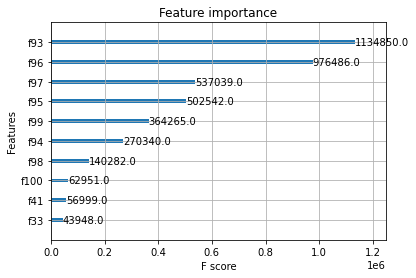

In [58]:
from xgboost import plot_importance

plot_importance(pipeline_all.named_steps['all_stores_model'], max_num_features=10)
plt.show()

In [68]:
test_input = df_test.drop(columns=['id', 'date'])
cols_order = X_train.columns.tolist()
cols_order

['store_nbr',
 'family',
 'onpromotion',
 'day',
 'month',
 'year',
 'dayofweek',
 'city',
 'state',
 'type',
 'cluster',
 'holiday',
 'dcoilwtico',
 'payment']

In [69]:
print(test_input.columns.tolist())

['store_nbr', 'family', 'onpromotion', 'city', 'state', 'type', 'cluster', 'day', 'month', 'year', 'dayofweek', 'holiday', 'dcoilwtico', 'payment']


In [70]:
# Ajuste necessário para o pipeline

test_input = test_input[cols_order]
print(test_input.columns.tolist())

['store_nbr', 'family', 'onpromotion', 'day', 'month', 'year', 'dayofweek', 'city', 'state', 'type', 'cluster', 'holiday', 'dcoilwtico', 'payment']


In [71]:
all_stores_prediction = pipeline_all.predict(test_input)
print(all_stores_prediction)

[6.3072104e+00 1.0981677e+00 1.5809203e+01 ... 1.1826578e+03 2.9964172e+01
 1.9072313e+01]


In [72]:
submission = pd.DataFrame({'id':df_test['id'], 'sales':all_stores_prediction})
submission

,id,sales
0,3000888,6.307210
1,3000889,1.098168
2,3000890,15.809203
3,3000891,2246.736572
4,3000892,0.598740
...,...,...
28507,3029395,336.912720
28508,3029396,71.806068
28509,3029397,1182.657837
28510,3029398,29.964172


In [73]:
submission.to_csv('submission.csv', index=False)
#Kaggle Score: 0.73841 (RMSLE)